# Projeto Reciclagem ...


# Carregando bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando a base de Dados

In [5]:
# Carregar a planilha
file_path = 'compras_reciclagem_2024.xlsx'
df = pd.read_excel(file_path)

# Renomear colunas
df['Data'] = pd.to_datetime(df['Data'])
colunas = ('rp_cat', 'fornecedor', 'data', 'produto', 'categoria', 'qtde', 'preco', 'valor')
df.columns = colunas
df = df[df['categoria'] != 'MADEIRA']

In [ ]:
### serve para analisar se há dados faltantes na planilha e os data type das colunas ###
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80907 entries, 0 to 80936
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rp_cat      80907 non-null  object        
 1   fornecedor  80907 non-null  object        
 2   data        80907 non-null  datetime64[ns]
 3   produto     80907 non-null  object        
 4   categoria   80907 non-null  object        
 5   qtde        80907 non-null  float64       
 6   preco       80907 non-null  float64       
 7   valor       80907 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 5.6+ MB


## Filtrando o Dataset

In [7]:
# Especificando o mês e ano que você deseja filtrar
mes_especifico = 5  # alterar aqui para filtrar todos os gráficos e atualizar!
ano_especifico = 2024

# Filtrando os dados para o mês e ano específicos
df_filtrado = df[(df['data'].dt.month == mes_especifico) & (df['data'].dt.year == ano_especifico)]


## Gráfico 1: Distribuição das Categorias dos Produtos

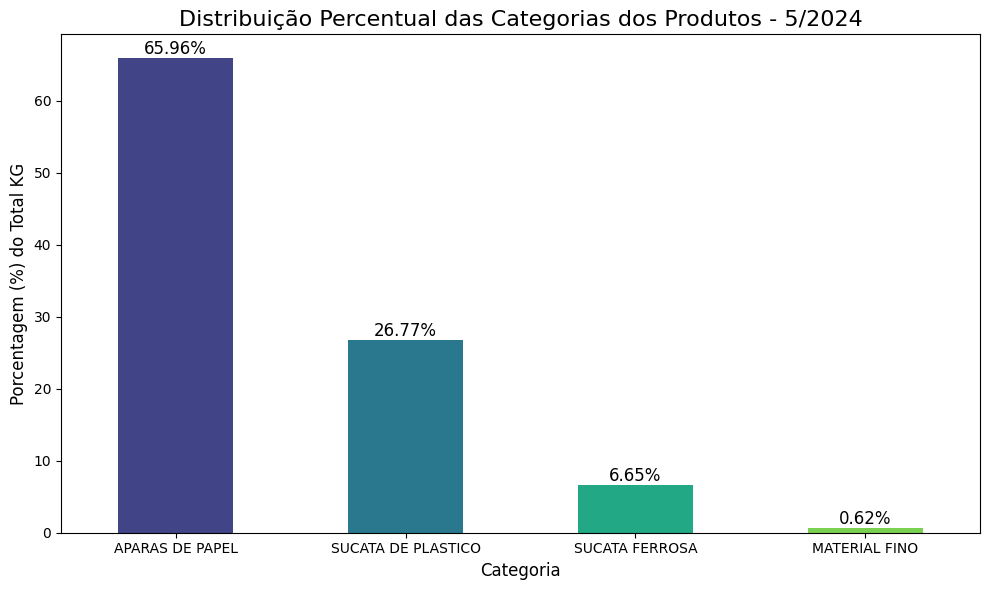

In [22]:
# Agrupando as categorias e somando as quantidades
quantidade_por_categoria = df_filtrado.groupby('categoria')['qtde'].sum().sort_values(ascending=False)

# Calculando o total de quantidades
total_quantidade = quantidade_por_categoria.sum()

# Calculando a porcentagem de cada categoria em relação ao total
percentual_por_categoria = (quantidade_por_categoria / total_quantidade) * 100

# Garantindo que há categorias para plotar
if not percentual_por_categoria.empty:
    # Plotando o gráfico de barras para as categorias
    plt.figure(figsize=(10, 6))
    ax = percentual_por_categoria.plot.bar(color=sns.color_palette('viridis', percentual_por_categoria.nunique()))

    # Formatando o gráfico
    ax.set_xlabel('Categoria', fontsize=12)
    ax.set_ylabel('Porcentagem (%) do Total KG', fontsize=12)
    ax.set_title(f'Distribuição Percentual das Categorias dos Produtos - {mes_especifico}/{ano_especifico}', fontsize=16)
    plt.xticks(rotation=0)
    plt.tight_layout()

    # Adicionando os valores em cima das barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=12)

    plt.show()
else:
    print("Nenhum dado disponível para o mês e ano especificados.")


## Top 3 Produtos por Categoria

In [23]:
# Filtrando os três principais produtos por categoria
top_produtos_por_categoria = df_filtrado.groupby(['categoria', 'produto'])['qtde'].sum().reset_index()
top_produtos_por_categoria = top_produtos_por_categoria.sort_values(['categoria', 'qtde'], ascending=[True, False])

# Calculando o total por categoria para cálculo de porcentagem
total_por_categoria = top_produtos_por_categoria.groupby('categoria')['qtde'].transform('sum')

# Calculando a porcentagem de cada produto dentro de sua categoria
top_produtos_por_categoria['percentual'] = (top_produtos_por_categoria['qtde'] / total_por_categoria) * 100

# Filtrando os três principais produtos por categoria com base no percentual
top_produtos_por_categoria = top_produtos_por_categoria.groupby('categoria').head(3)



C:\Users\Usuario\AppData\Local\Temp\ipykernel_5232\1496965880.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_categoria, x='produto', y='percentual', palette='viridis')


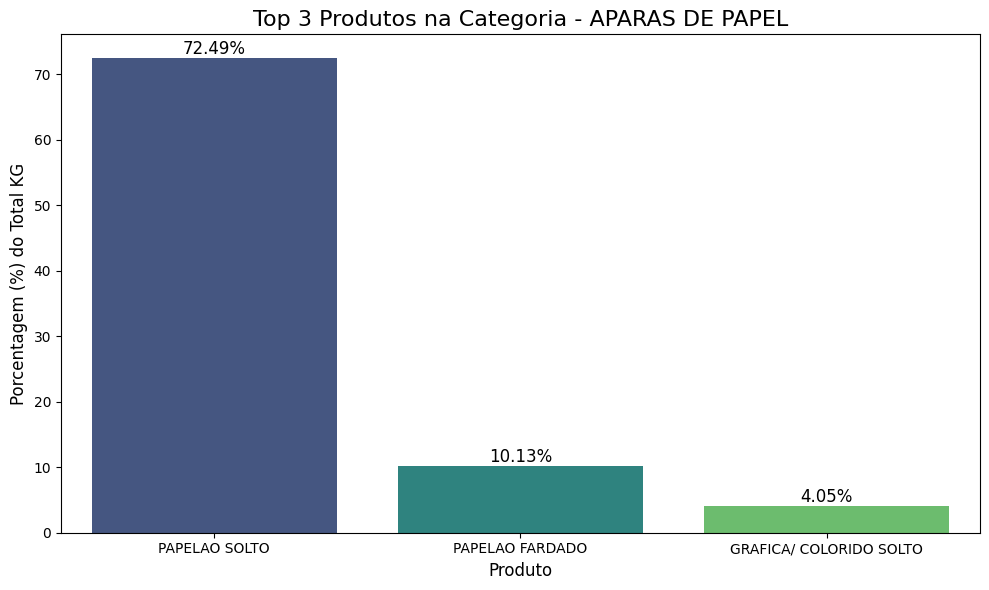

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5232\1496965880.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_categoria, x='produto', y='percentual', palette='viridis')


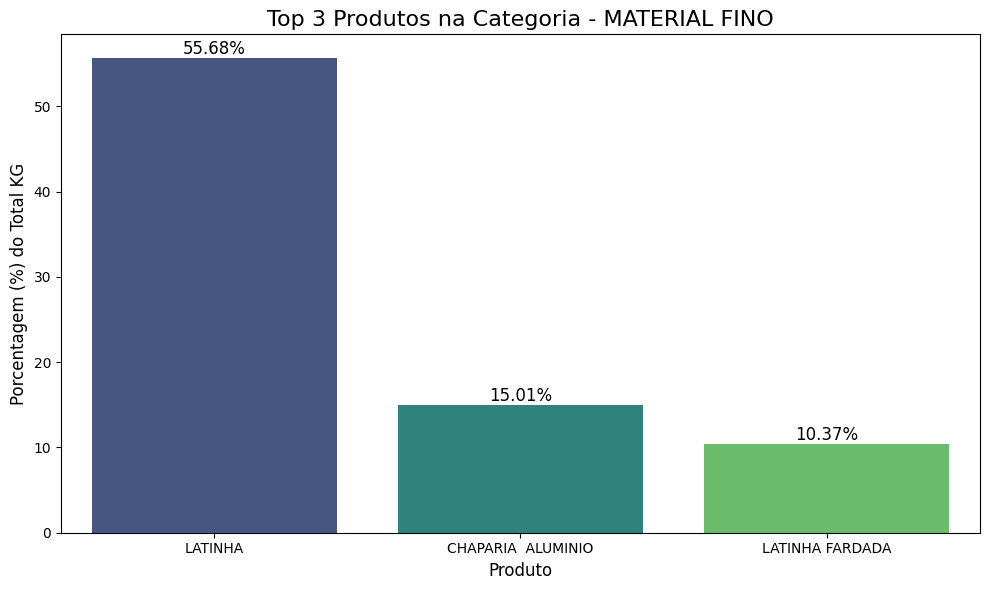

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5232\1496965880.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_categoria, x='produto', y='percentual', palette='viridis')


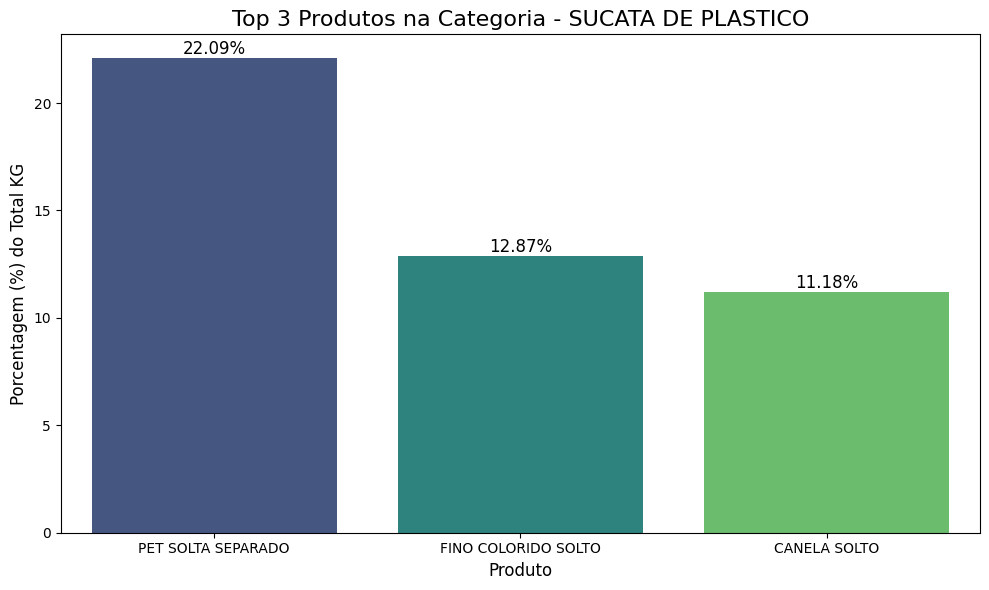

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5232\1496965880.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_categoria, x='produto', y='percentual', palette='viridis')


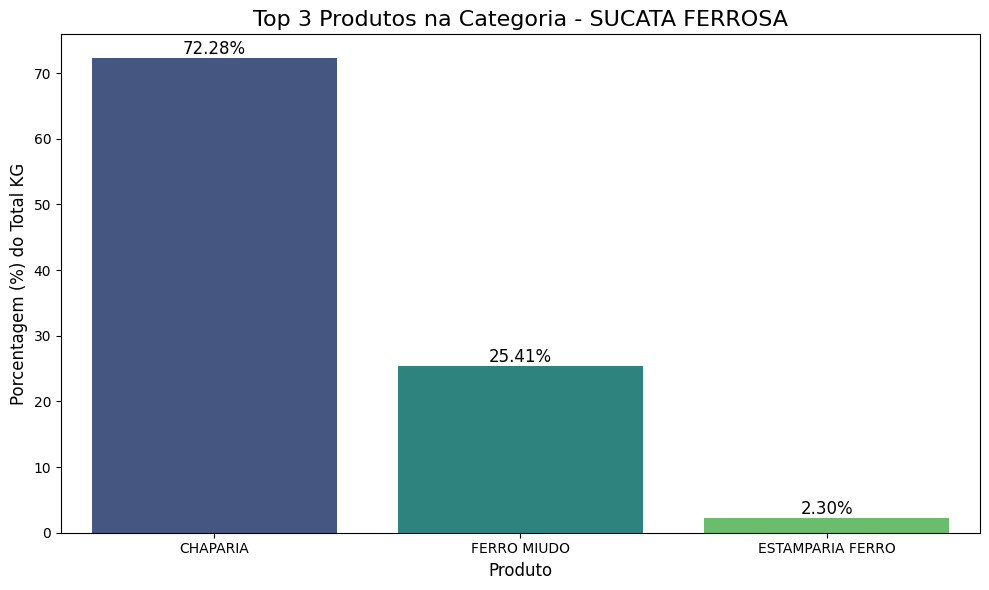

In [24]:
# Criando gráficos de barras separados para cada categoria
categorias = top_produtos_por_categoria['categoria'].unique()

for categoria in categorias:
    df_categoria = top_produtos_por_categoria[top_produtos_por_categoria['categoria'] == categoria]
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=df_categoria, x='produto', y='percentual', palette='viridis')

    # Formatando o gráfico
    ax.set_xlabel('Produto', fontsize=12)
    ax.set_ylabel('Porcentagem (%) do Total KG', fontsize=12)
    ax.set_title(f'Top 3 Produtos na Categoria - {categoria}', fontsize=16)
    plt.xticks(rotation=0)
    plt.tight_layout()

    # Adicionando os valores em cima das barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=12)

    plt.show()



## Curva Sazonal por Qtde (KG)

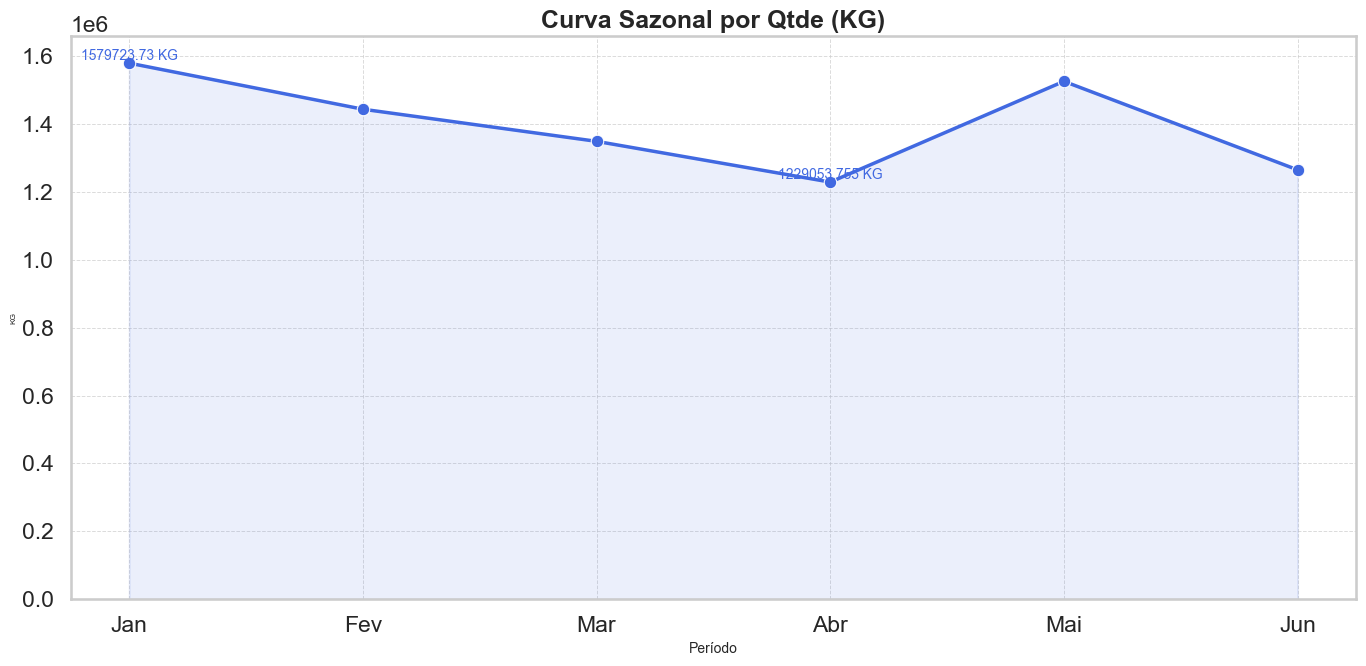

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupando por mês e somando as quantidades para o ano inteiro
df['mes'] = df['data'].dt.month
quantidade_por_mes = df.groupby('mes')['qtde'].sum().reset_index()

# Mapeando os números dos meses para os nomes dos meses
meses = {
    1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun',
    7: 'Jul', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'
}
quantidade_por_mes['mes'] = quantidade_por_mes['mes'].map(meses)

# Configurando o estilo do gráfico
sns.set_style("whitegrid")
sns.set_context("talk")

# Plotando o gráfico de linha com estilo aprimorado
plt.figure(figsize=(14, 7))
ax = sns.lineplot(data=quantidade_por_mes, x='mes', y='qtde', marker='o', linewidth=2.5, color='royalblue')

# Adicionando preenchimento abaixo da linha
plt.fill_between(quantidade_por_mes['mes'], quantidade_por_mes['qtde'], color='royalblue', alpha=0.1)

# Adicionando anotações de pontos máximos e mínimos
max_value = quantidade_por_mes['qtde'].max()
min_value = quantidade_por_mes['qtde'].min()
max_month = quantidade_por_mes[quantidade_por_mes['qtde'] == max_value]['mes'].iloc[0]
min_month = quantidade_por_mes[quantidade_por_mes['qtde'] == min_value]['mes'].iloc[0]

plt.text(max_month, max_value, f'{max_value} KG', ha='center', va='bottom', fontsize=10, color='royalblue')
plt.text(min_month, min_value, f'{min_value} KG', ha='center', va='bottom', fontsize=10, color='royalblue')

# Formatando o gráfico
plt.xlabel('Período', fontsize=10)
plt.ylabel('KG', fontsize=6)
plt.title('Curva Sazonal por Qtde (KG)', fontsize=18, weight='bold')
plt.xticks(rotation=0)
plt.ylim(0)  # Configurando o eixo Y para começar do zero
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()

plt.show()


In [ ]:
# Carregar a planilha
file_path = 'compras_reciclagem_2024.xlsx'
df = pd.read_excel(file_path)

# Renomear colunas
df['Data'] = pd.to_datetime(df['Data'])
colunas = ('rp_cat', 'fornecedor', 'data', 'produto', 'categoria', 'qtde', 'preco', 'valor')
df.columns = colunas
df = df[df['categoria'] != 'MADEIRA']

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5232\1778524736.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_5_fornecedores_quantidade, x='qtde', y='fornecedor', palette='mako', edgecolor='black')


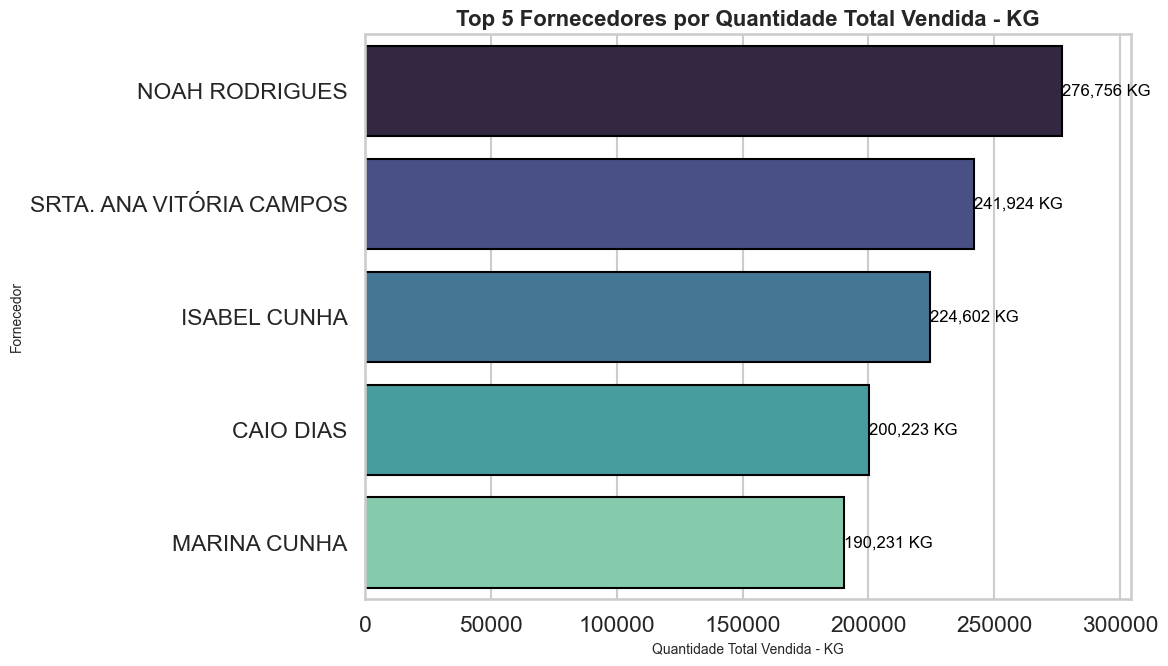

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Top 5 fornecedores por quantidade total vendida
top_5_fornecedores_quantidade = df.groupby('fornecedor')['qtde'].sum().reset_index().sort_values(by='qtde', ascending=False).head(5)

# Configurando o estilo do gráfico
sns.set_style("whitegrid")
sns.set_context("talk")

# Gráfico dos top 5 fornecedores por quantidade total vendida
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=top_5_fornecedores_quantidade, x='qtde', y='fornecedor', palette='mako', edgecolor='black')

# Título e rótulos dos eixos
ax.set_title('Top 5 Fornecedores por Quantidade Total Vendida - KG', fontsize=16, weight='bold')
ax.set_xlabel('Quantidade Total Vendida - KG', fontsize=10)
ax.set_ylabel('Fornecedor', fontsize=10
)

# Formatando números com separador de milhar e valores no gráfico
for index, value in enumerate(top_5_fornecedores_quantidade['qtde']):
    ax.text(value, index, f'{value:,.0f} KG', color='black', ha="left", va="center", fontsize=12)

# Ajustando a escala do eixo X para ter um pouco de espaço extra
max_value = top_5_fornecedores_quantidade['qtde'].max()
plt.xlim(0, max_value * 1.1)

plt.tight_layout()
plt.show()


## Mapa de Calor | Distribuição de Movimento em KG por Semana e Dia da Semana

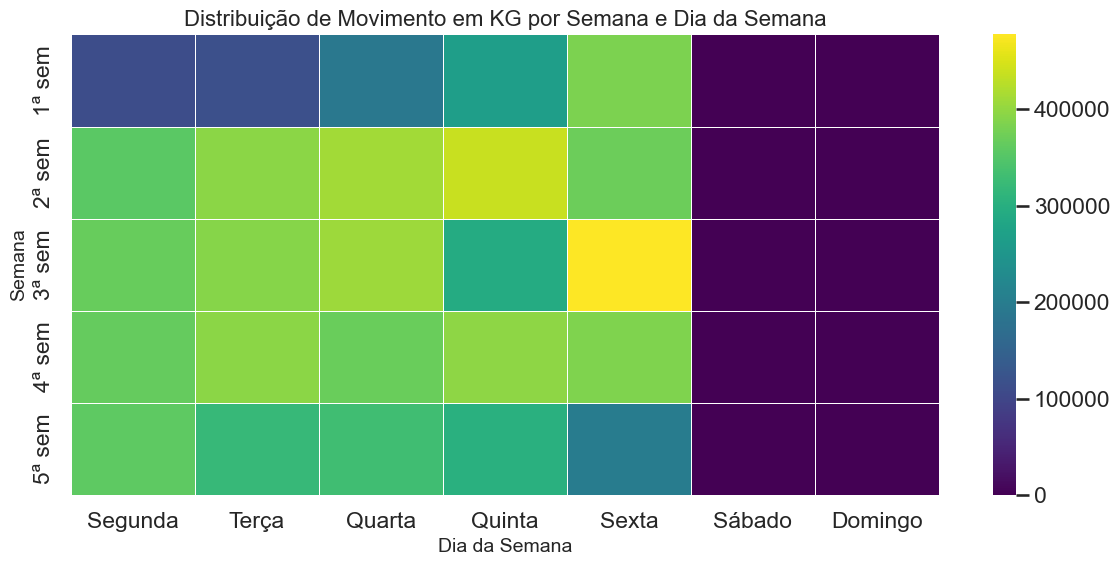

In [36]:
# Função para calcular a semana dentro do mês
def semana_do_mes(d):
    first_day = d.replace(day=1)
    dom = first_day - pd.Timedelta(days=first_day.weekday())
    return (d - dom).days // 7 + 1

# Adicionando colunas para a semana do mês e o dia da semana
df_filtrado = df.copy()
df_filtrado['semana_mes'] = df_filtrado['data'].apply(semana_do_mes)
df_filtrado['dia_da_semana'] = df_filtrado['data'].dt.dayofweek

# # Verificando se as colunas foram adicionadas corretamente
# print(df_filtrado[['data', 'semana_mes', 'dia_da_semana']].head())

# Agrupando por semana do mês e dia da semana e somando as quantidades
movimento_por_dia = df_filtrado.groupby(['semana_mes', 'dia_da_semana'])['qtde'].sum().unstack().fillna(0)

# Garantindo que todas as colunas dos dias da semana estejam presentes
dias_da_semana = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
movimento_por_dia = movimento_por_dia.reindex(columns=range(7), fill_value=0)
movimento_por_dia.columns = dias_da_semana

# Renomeando os índices das semanas para "1ª sem", "2ª sem", etc.
semanas = [f'{i}ª sem' for i in movimento_por_dia.index]
movimento_por_dia.index = semanas

# # Verificando o DataFrame resultante
# print(movimento_por_dia.head())

# Plotando o heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(movimento_por_dia, annot=False, cmap="viridis", cbar=True, linewidths=.5)

# Formatando o gráfico
plt.xlabel('Dia da Semana', fontsize=14)
plt.ylabel('Semana', fontsize=14)
plt.title('Distribuição de Movimento em KG por Semana e Dia da Semana', fontsize=16)
plt.tight_layout()

plt.show()

array([[<Axes: title={'center': 'data'}>,
        <Axes: title={'center': 'qtde'}>,
        <Axes: title={'center': 'preco'}>],
       [<Axes: title={'center': 'valor'}>,
        <Axes: title={'center': 'mes'}>,
        <Axes: title={'center': 'semana_mes'}>],
       [<Axes: title={'center': 'dia_da_semana'}>, <Axes: >, <Axes: >]],
      dtype=object)

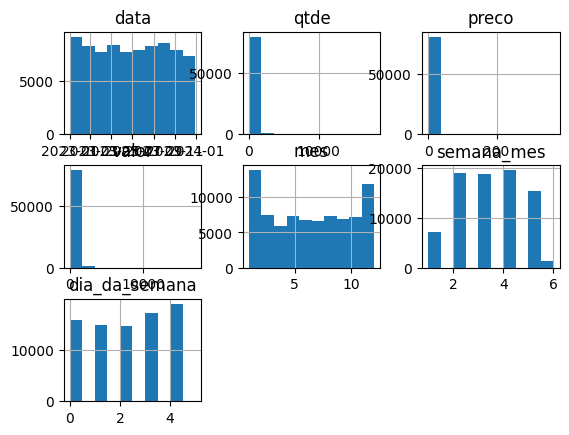

In [ ]:
df_filtrado.hist()